## Glass Dataset

## Importing libraries

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('glass.csv')

## Visualizing some values in data

In [7]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [9]:
# checking the size of our dataset
data.shape

(214, 10)

In [11]:
# checking missing data. There's no missing values
data.isnull().sum().sum()

0

In [23]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

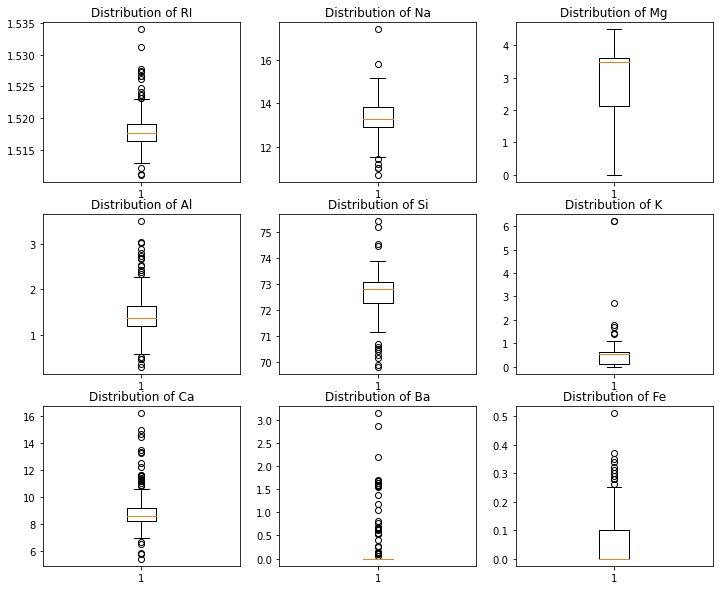

In [24]:
## Checking each column for outliers
fig = plt.figure(figsize = (12,10))

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,3,7)
ax8 = fig.add_subplot(3,3,8)
ax9 = fig.add_subplot(3,3,9)

# Boxplot for RI
ax1.boxplot(data['RI'])
ax1.set_title('Distribution of RI')

# Boxplot for Na
ax2.boxplot(data['Na'])
ax2.set_title('Distribution of Na')

# Boxplot for Mg
ax3.boxplot(data['Mg'])
ax3.set_title('Distribution of Mg')


# Boxplot for AL
ax4.boxplot(data['Al'])
ax4.set_title('Distribution of Al')



# Boxplot for Si
ax5.boxplot(data['Si'])
ax5.set_title('Distribution of Si')


# Boxplot for K
ax6.boxplot(data['K'])
ax6.set_title('Distribution of K')

# Boxplot for Ca
ax7.boxplot(data['Ca'])
ax7.set_title('Distribution of Ca')


# Boxplot for Ba
ax8.boxplot(data['Ba'])
ax8.set_title('Distribution of Ba')


# Boxplot for Fe
ax9.boxplot(data['Fe'])
ax9.set_title('Distribution of Fe');


Visualizing the frequency of types in our dataset

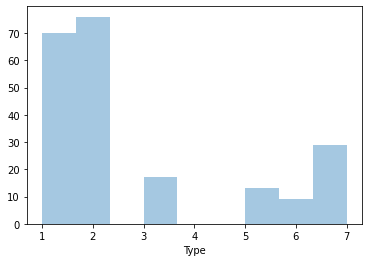

In [42]:
sns.distplot(data['Type'], kde = False)

### Let's split the data into X and Y

In [33]:
X = data.iloc[:,:-1]
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [34]:
y = data['Type']
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

## splitting data into train and test

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 50)

## Decision tree 

In [40]:
from sklearn import tree

In [43]:
classifier_tree = tree.DecisionTreeClassifier()

In [46]:
classifier_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Visualizing our tree

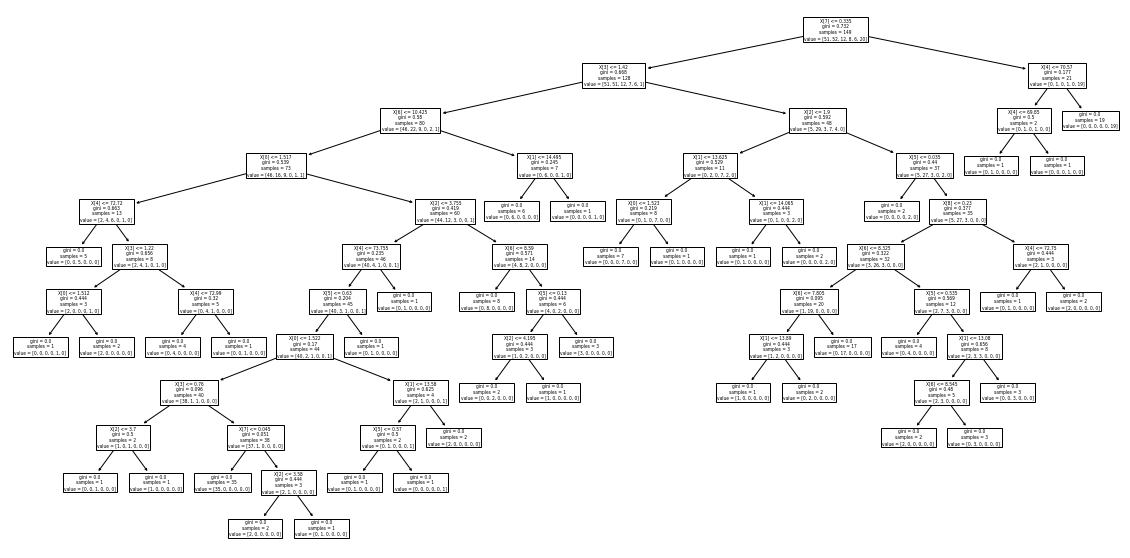

In [48]:
plt.figure(figsize = (20,10))
tree.plot_tree(classifier_tree);

## Making Predictions

In [49]:
predict_type = classifier_tree.predict(X_test)

In [50]:
predict_type

array([1, 2, 2, 1, 1, 1, 2, 3, 7, 1, 2, 2, 2, 2, 2, 1, 6, 7, 2, 2, 2, 2,
       3, 2, 3, 2, 1, 2, 7, 2, 1, 1, 1, 1, 3, 2, 5, 1, 2, 2, 7, 2, 2, 3,
       5, 2, 2, 1, 7, 3, 5, 2, 1, 6, 7, 3, 1, 2, 7, 5, 2, 3, 1, 1, 2],
      dtype=int64)

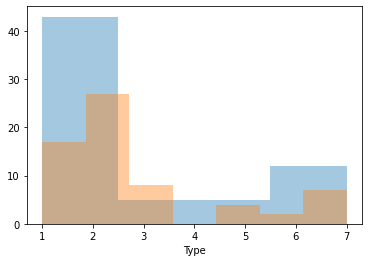

In [52]:
## Let's plot to see how it's performance
sns.distplot(y_test, kde = False)
sns.distplot(predict_type, kde = False)

## Accuracy of our tree

In [53]:
from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(y_test,predict_type)

0.6461538461538462

## Testing with K neighbors

In [56]:
from sklearn.neighbors import KNeighborsClassifier

In [57]:
classifier_n = KNeighborsClassifier()

In [58]:
classifier_n.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Making predictions

In [60]:
predict_type_n = classifier_n.predict(X_test)

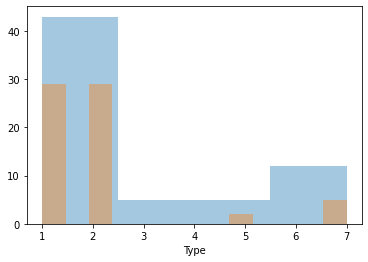

In [61]:
## Let's plot to see how it's performance
sns.distplot(y_test, kde = False)
sns.distplot(predict_type_n, kde = False)

## Accuracy of our Knn


In [62]:
accuracy_score(y_test,predict_type_n)

0.6307692307692307